# Predictive Modeling

In [95]:
import pandas as pd

In [96]:
students = pd.read_csv('Dataset_Week2.csv')
students.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,...,SignUpMonth,SignUpYear,Time in Opportunity,Opportunity Category Encoded,Engagement Score,SignUpDayOfWeek,Engagement_Per_Day,Last Engagement Date,Days Since Last Engagement,High Engagement
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,Faria,2001-01-12,Female,Pakistan,Nwihs,...,6,2023,604,1,248.8,Wednesday,0.367550,2022-11-03 18:30:39,222,1
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,Saintlouis,...,5,2023,604,1,248.8,Monday,0.294702,2022-11-03 18:30:39,178,1
2,2023-04-09 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinoisinstituteoftechnology,...,4,2023,604,1,248.5,Sunday,0.259934,2022-11-03 18:30:39,157,1
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,Amruthavarshini,1999-11-01,Female,United States,Saintlouisuniversity,...,8,2023,604,1,249.1,Tuesday,0.562914,2022-11-03 18:30:39,298,1
4,2023-01-06 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,Vinayvarshith,2000-04-19,Male,United States,Saintlouisuniversity,...,1,2023,604,1,248.8,Friday,0.104305,2022-11-03 18:30:39,63,1


In [97]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Learner SignUp DateTime       8558 non-null   object 
 1   Opportunity Id                8558 non-null   object 
 2   Opportunity Name              8558 non-null   object 
 3   Opportunity Category          8558 non-null   object 
 4   Opportunity End Date          8558 non-null   object 
 5   First Name                    8558 non-null   object 
 6   Date of Birth                 8558 non-null   object 
 7   Gender                        8558 non-null   object 
 8   Country                       8558 non-null   object 
 9   Institution Name              8558 non-null   object 
 10  Current/Intended Major        8558 non-null   object 
 11  Entry created at              8558 non-null   object 
 12  Status Description            8558 non-null   object 
 13  Sta

# Data Cleaning and Validation

In [98]:
# Checking number of null values in each column
students.isnull().sum()

Learner SignUp DateTime         0
Opportunity Id                  0
Opportunity Name                0
Opportunity Category            0
Opportunity End Date            0
First Name                      0
Date of Birth                   0
Gender                          0
Country                         0
Institution Name                0
Current/Intended Major          0
Entry created at                0
Status Description              0
Status Code                     0
Apply Date                      0
Opportunity Start Date          0
Age of Learner                  0
Engagement Duration             0
SignUpMonth                     0
SignUpYear                      0
Time in Opportunity             0
Opportunity Category Encoded    0
Engagement Score                0
SignUpDayOfWeek                 0
Engagement_Per_Day              0
Last Engagement Date            0
Days Since Last Engagement      0
High Engagement                 0
dtype: int64

In [99]:
# Convert 'Date of Birth' to datetime63[ns] while keeping only the date
students['Date of Birth'] = pd.to_datetime(students['Date of Birth']).dt.normalize()

print(students['Date of Birth'].head())
print(students.dtypes)

0   2001-01-12
1   2000-08-16
2   2002-01-27
3   1999-11-01
4   2000-04-19
Name: Date of Birth, dtype: datetime64[ns]
Learner SignUp DateTime                 object
Opportunity Id                          object
Opportunity Name                        object
Opportunity Category                    object
Opportunity End Date                    object
First Name                              object
Date of Birth                   datetime64[ns]
Gender                                  object
Country                                 object
Institution Name                        object
Current/Intended Major                  object
Entry created at                        object
Status Description                      object
Status Code                              int64
Apply Date                              object
Opportunity Start Date                  object
Age of Learner                           int64
Engagement Duration                      int64
SignUpMonth                         

In [100]:
# Convert the following columns to datetime63[ns] format
date_columns = ['Opportunity End Date', 'Apply Date', 'Opportunity Start Date', 'Learner SignUp DateTime']

for column in date_columns:
    students[column] = pd.to_datetime(students[column], errors='coerce')

# Verify the conversions
print(students[date_columns].dtypes)

Opportunity End Date       datetime64[ns]
Apply Date                 datetime64[ns]
Opportunity Start Date     datetime64[ns]
Learner SignUp DateTime    datetime64[ns]
dtype: object


In [101]:
# Drop all columns that are completely empty (have no values)
students.dropna(axis=1, how='all', inplace=True)

In [102]:
# Drop rows where First Name and Last Name contain characters other than alphabets
students = students[students['First Name'].apply(lambda x: str(x).isalpha())]

In [103]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Learner SignUp DateTime       8558 non-null   datetime64[ns]
 1   Opportunity Id                8558 non-null   object        
 2   Opportunity Name              8558 non-null   object        
 3   Opportunity Category          8558 non-null   object        
 4   Opportunity End Date          8558 non-null   datetime64[ns]
 5   First Name                    8558 non-null   object        
 6   Date of Birth                 8558 non-null   datetime64[ns]
 7   Gender                        8558 non-null   object        
 8   Country                       8558 non-null   object        
 9   Institution Name              8558 non-null   object        
 10  Current/Intended Major        8558 non-null   object        
 11  Entry created at              

# Visualization

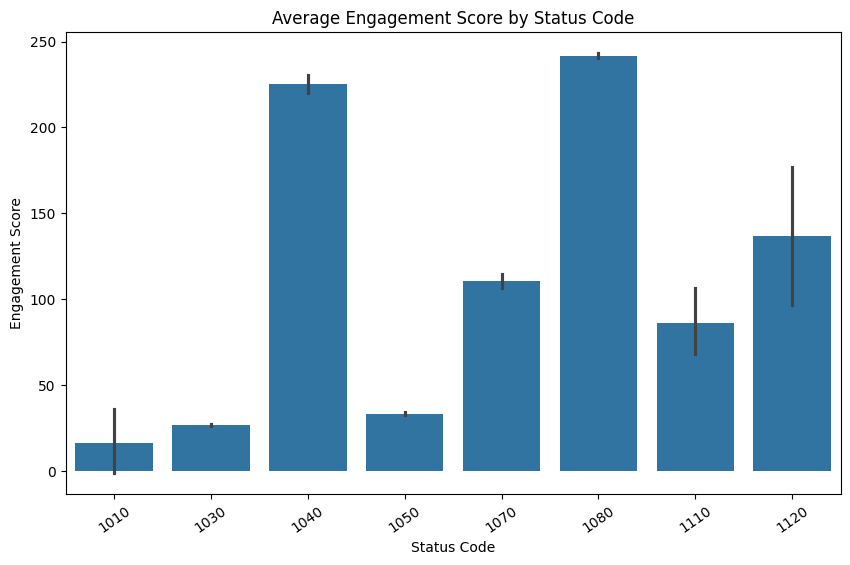

In [104]:
# visulaisation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data

#1. Engagement Score vs. Status Code/Description

# Bar Chart:

plt.figure(figsize=(10, 6))
sns.barplot(data=students, x='Status Code', y='Engagement Score', estimator='mean')
plt.title('Average Engagement Score by Status Code')
plt.xticks(rotation=35)
plt.show()

UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('O') and dtype('<m8[ns]')

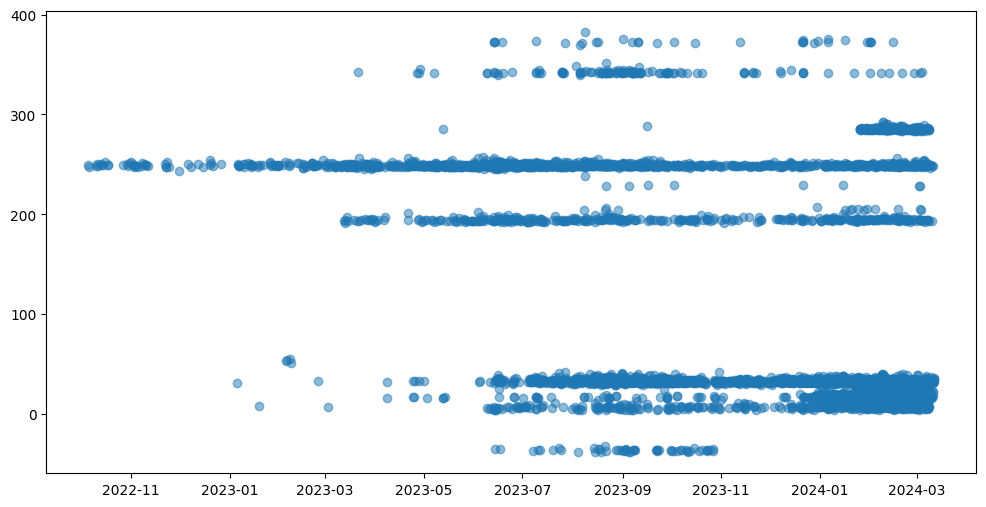

In [106]:
#2. Apply Date vs. Engagement Score

# Ensure 'Apply Date' is in datetime format
students['Apply Date'] = pd.to_datetime(students['Apply Date'], errors='coerce')

# Scatter Plot with Trendline:
plt.figure(figsize=(12, 6))
sns.regplot(data=students, x='Apply Date', y='Engagement Score', scatter_kws={'alpha':0.5})
plt.title('Engagement Score vs. Apply Date')
plt.xticks(rotation=35)
plt.show()



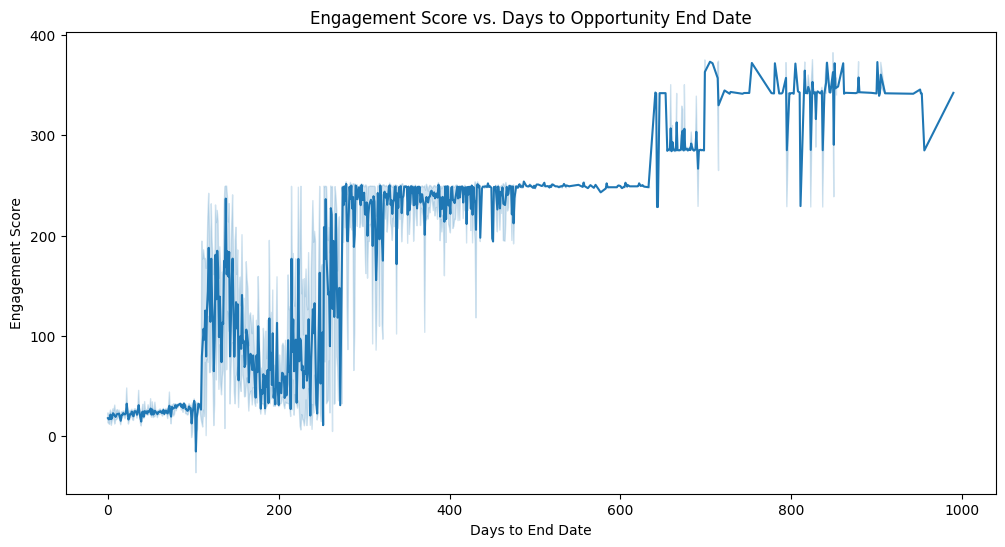

In [107]:
#3. Days to Opportunity End Date vs. Engagement Score

# Convert Opportunity End Date to a countdown (days remaining):

students['Days to End Date'] = (pd.to_datetime(students['Opportunity End Date']) - pd.to_datetime(students['Apply Date'])).dt.days

plt.figure(figsize=(12, 6))
sns.lineplot(data=students, x='Days to End Date', y='Engagement Score')
plt.title('Engagement Score vs. Days to Opportunity End Date')
plt.show()



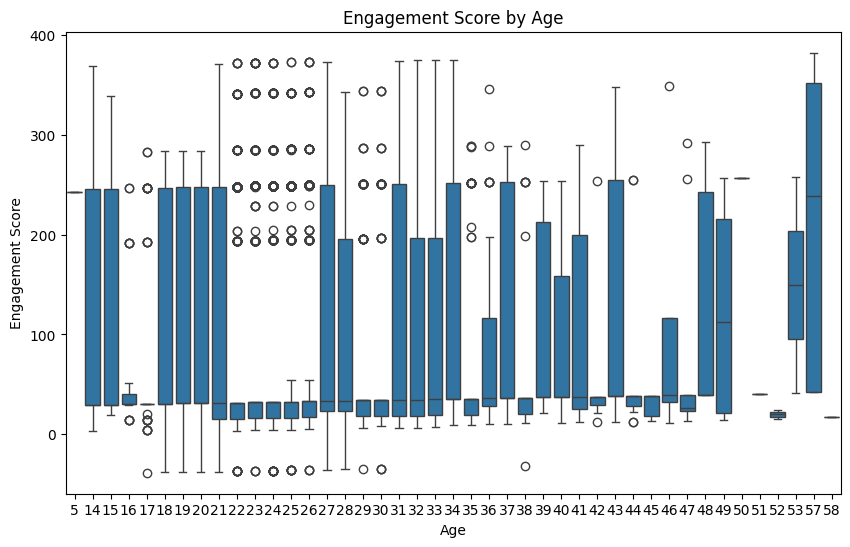

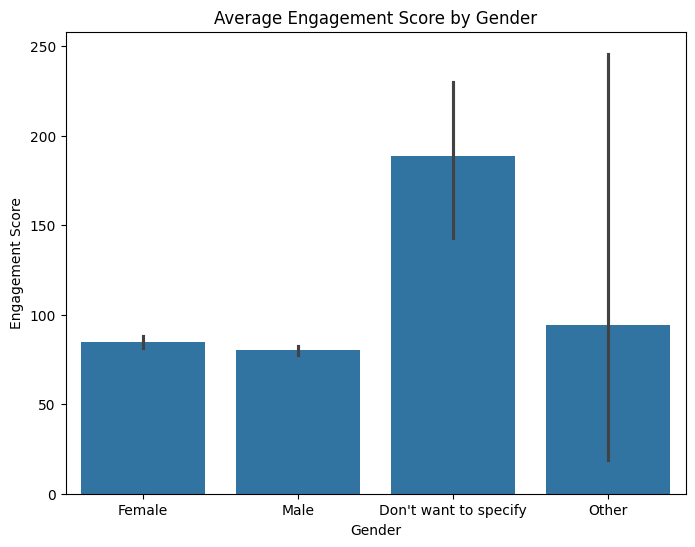

In [108]:
#3. Demographics (Age, Gender, Location) vs. Engagement Score

# Box Plot for Age (assuming Date of Birth is converted to Age):

students['Age'] = (pd.to_datetime('today') - pd.to_datetime(students['Date of Birth'])).dt.days // 365

plt.figure(figsize=(10, 6))
sns.boxplot(data=students, x='Age', y='Engagement Score')
plt.title('Engagement Score by Age')
plt.show()

# Bar Chart for Gender:

plt.figure(figsize=(8, 6))
sns.barplot(data=students, x='Gender', y='Engagement Score', estimator='mean')
plt.title('Average Engagement Score by Gender')
plt.show()



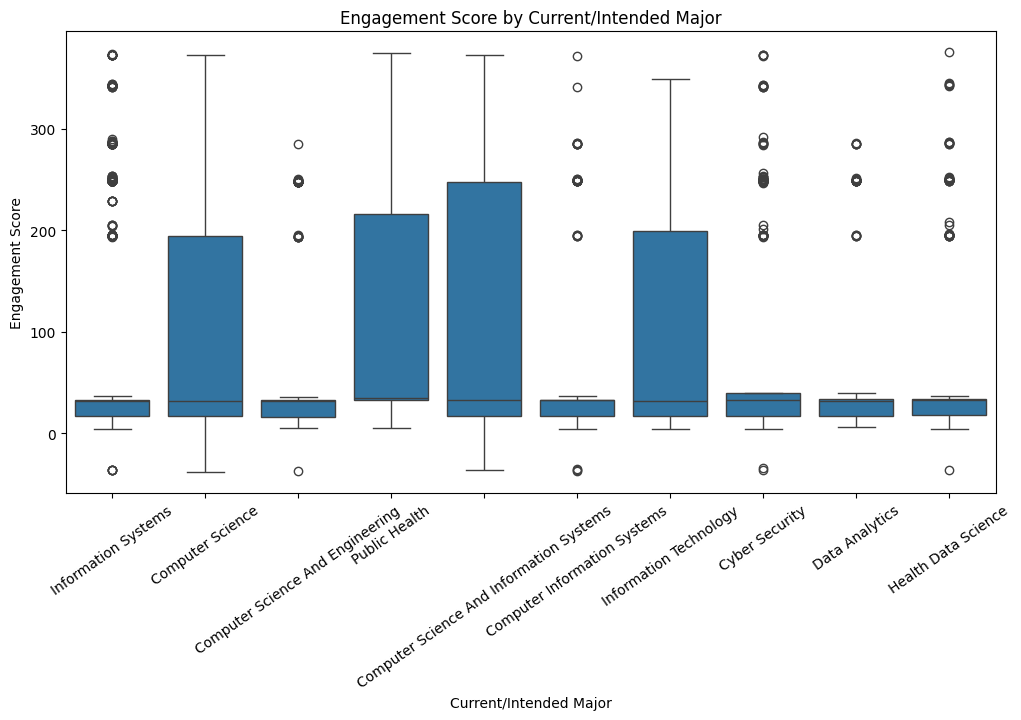

In [109]:
#5. Current/Intended Major vs. Engagement Score

# Box Plot for Major:

# Filter for top 10 majors by count
top_majors = students['Current/Intended Major'].value_counts().nlargest(10).index
students_top_majors = students[students['Current/Intended Major'].isin(top_majors)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=students_top_majors, x='Current/Intended Major', y='Engagement Score')
plt.title('Engagement Score by Current/Intended Major')
plt.xticks(rotation=35)
plt.show()



C:\Users\shahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


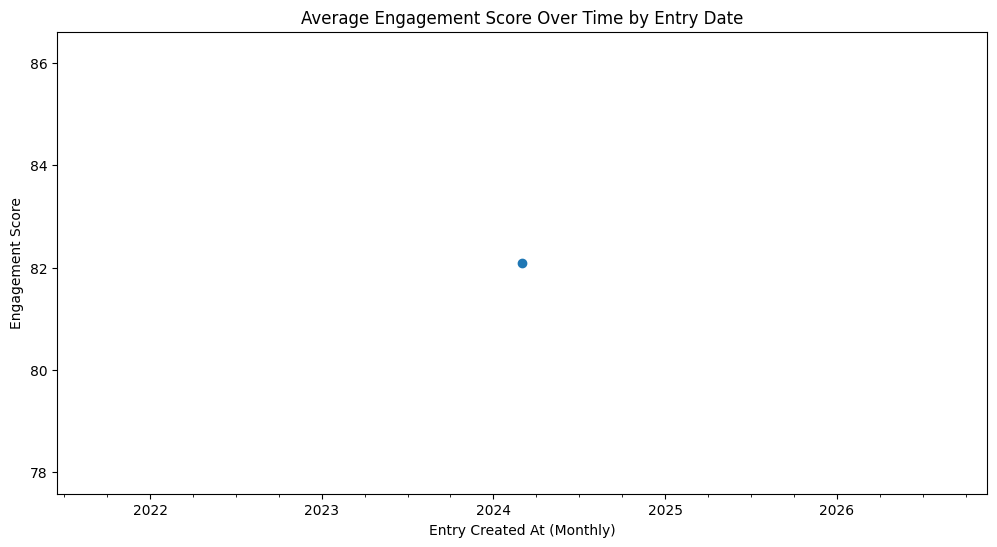

In [ ]:
#6. Entry Created At vs. Engagement Score

# Line Plot by Entry Created Date:

students['Entry created at'] = pd.to_datetime(students['Entry created at'], errors='coerce').dt.to_period('M')
monthly_engagement = students.groupby('Entry created at')['Engagement Score'].mean()

plt.figure(figsize=(12, 6))
monthly_engagement.plot(kind='line', marker='o')
plt.title('Average Engagement Score Over Time by Entry Date')
plt.xlabel('Entry Created At (Monthly)')
plt.ylabel('Engagement Score')
plt.show()



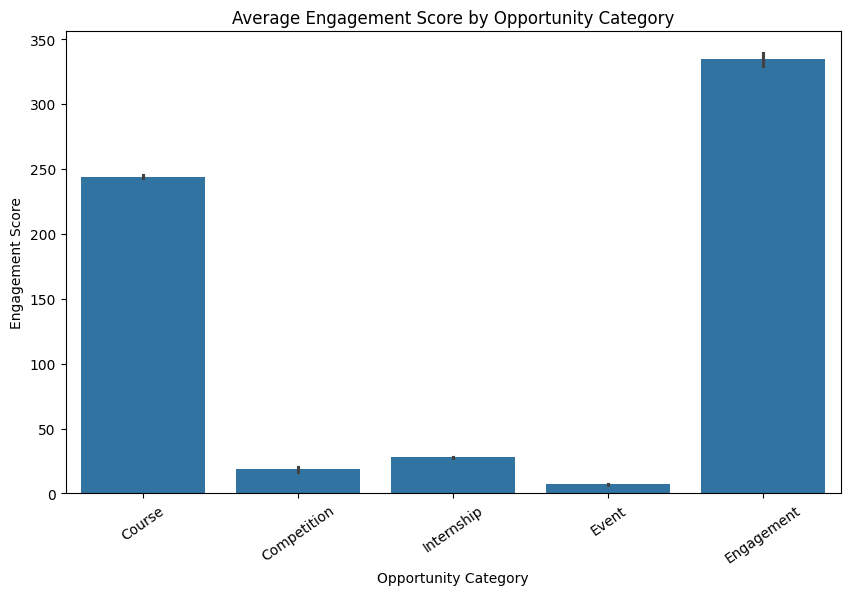

In [ ]:
#7. Opportunity Category vs. Engagement Score

# Bar Chart for Opportunity Category:

plt.figure(figsize=(10, 6))
sns.barplot(data=students, x='Opportunity Category', y='Engagement Score', estimator='mean')
plt.title('Average Engagement Score by Opportunity Category')
plt.xticks(rotation=35)
plt.show()



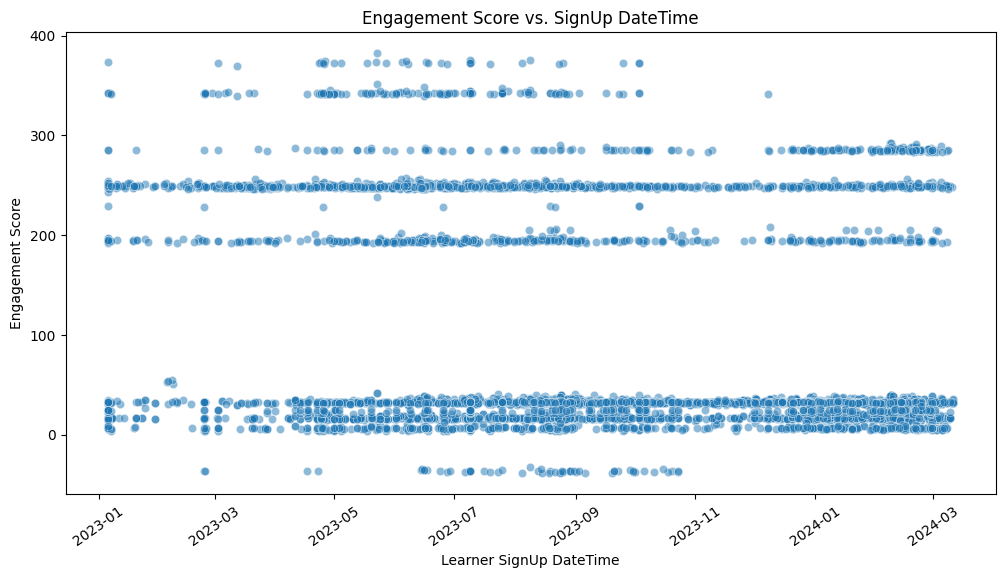

In [ ]:
#8. Learner SignUp DateTime vs. Engagement Score

# Scatter Plot for SignUp DateTime:

students['Learner SignUp DateTime'] = pd.to_datetime(students['Learner SignUp DateTime'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=students, x='Learner SignUp DateTime', y='Engagement Score', alpha=0.5)
plt.title('Engagement Score vs. SignUp DateTime')
plt.xticks(rotation=35)
plt.show()

# Feature Engineering

## 1. Creating New Features

In [114]:
### 1.1: Age of Learner
from datetime import datetime
import pandas as pd

# Ensure 'Date of Birth' is in datetime format
students['Date of Birth'] = pd.to_datetime(students['Date of Birth'], errors='coerce')

# Calculate the age of learners
today = pd.Timestamp(datetime.today())

# Calculate the age, taking into account whether the birthday has occurred yet this year
students['Age of Learner'] = today.year - students['Date of Birth'].dt.year - (
    (today.month < students['Date of Birth'].dt.month) |
    ((today.month == students['Date of Birth'].dt.month) & (today.day < students['Date of Birth'].dt.day))
)

# Display the first few rows to verify the age calculation
print(students[['Date of Birth', 'Age of Learner']].head())

  Date of Birth  Age of Learner
0    2001-01-12              24
1    2000-08-16              24
2    2002-01-27              23
3    1999-11-01              25
4    2000-04-19              24


In [115]:
### 1.2: Engagement Duration
# Ensure 'Apply Date' and 'Opportunity Start Date' are in datetime format
students['Apply Date'] = pd.to_datetime(students['Apply Date'], errors='coerce')
students['Opportunity Start Date'] = pd.to_datetime(students['Opportunity Start Date'], errors='coerce')

# Calculate the engagement duration (difference in days between application and start date)
students['Engagement Duration'] = (students['Opportunity Start Date'] - students['Apply Date']).dt.days

# Display the first few rows to verify the calculation
print(students[['Apply Date', 'Opportunity Start Date', 'Engagement Duration']].head())

           Apply Date Opportunity Start Date  Engagement Duration
0 2023-06-14 12:36:09    2022-11-03 18:30:39                 -223
1 2023-05-01 06:08:21    2022-11-03 18:30:39                 -179
2 2023-04-09 20:35:08    2022-11-03 18:30:39                 -158
3 2023-10-09 22:02:42    2022-11-03 18:30:39                 -341
4 2023-01-06 15:40:10    2022-11-03 18:30:39                  -64


## 2. Transforming Existing Features

In [116]:
### 2.1: Normalization of Engagement Metrices
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['Age of Learner', 'Engagement Duration']

# Apply Min-Max Scaling
students[columns_to_normalize] = scaler.fit_transform(students[columns_to_normalize])

# Display the first few rows to check the normalization
print(students[['Age of Learner', 'Engagement Duration']].head())

   Age of Learner  Engagement Duration
0        0.358491             0.305180
1        0.358491             0.354730
2        0.339623             0.378378
3        0.377358             0.172297
4        0.358491             0.484234


In [117]:
students.nunique()

Learner SignUp DateTime         3805
Opportunity Id                    23
Opportunity Name                  22
Opportunity Category               5
Opportunity End Date              15
First Name                      2871
Date of Birth                   2620
Gender                             4
Country                           71
Institution Name                1758
Current/Intended Major           393
Entry created at                   1
Status Description                 8
Status Code                        8
Apply Date                      8449
Opportunity Start Date            13
Age of Learner                    43
Engagement Duration              727
SignUpMonth                       12
SignUpYear                         2
Time in Opportunity               15
Opportunity Category Encoded       5
Engagement Score                 280
SignUpDayOfWeek                    7
Engagement_Per_Day              1453
Last Engagement Date              13
Days Since Last Engagement       830
H

In [118]:
### 2.2: Encoding Categorical Data
# One-Hot Encoding
one_hot = ['Opportunity Name', 'Opportunity Category', 'Gender', 'Current Student Status', 'Status Description']

# Check for the existence of each column before applying one-hot encoding
one_hot_existing = [col for col in one_hot if col in students.columns]

students_encoded = pd.get_dummies(students, columns=one_hot_existing, drop_first=True)
students_encoded.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity End Date,First Name,Date of Birth,Country,Institution Name,Current/Intended Major,Entry created at,Status Code,...,Gender_Female,Gender_Male,Gender_Other,Status Description_Dropped Out,Status Description_Rejected,Status Description_Rewards Award,Status Description_Started,Status Description_Team Allocated,Status Description_Waitlisted,Status Description_Withdraw
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Faria,2001-01-12,Pakistan,Nwihs,Radiology,2024-03,1080,...,True,False,False,False,False,False,True,False,False,False
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Poojitha,2000-08-16,India,Saintlouis,Information Systems,2024-03,1080,...,True,False,False,False,False,False,True,False,False,False
2,2023-04-09 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Emmanuel,2002-01-27,United States,Illinoisinstituteoftechnology,Computer Science,2024-03,1080,...,False,True,False,False,False,False,True,False,False,False
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Amruthavarshini,1999-11-01,United States,Saintlouisuniversity,Information Systems,2024-03,1070,...,True,False,False,False,False,False,False,True,False,False
4,2023-01-06 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Vinayvarshith,2000-04-19,United States,Saintlouisuniversity,Computer Science,2024-03,1080,...,False,True,False,False,False,False,True,False,False,False


In [119]:
students_encoded.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity End Date,First Name,Date of Birth,Country,Institution Name,Current/Intended Major,Entry created at,Status Code,...,Gender_Female,Gender_Male,Gender_Other,Status Description_Dropped Out,Status Description_Rejected,Status Description_Rewards Award,Status Description_Started,Status Description_Team Allocated,Status Description_Waitlisted,Status Description_Withdraw
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Faria,2001-01-12,Pakistan,Nwihs,Radiology,2024-03,1080,...,True,False,False,False,False,False,True,False,False,False
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Poojitha,2000-08-16,India,Saintlouis,Information Systems,2024-03,1080,...,True,False,False,False,False,False,True,False,False,False
2,2023-04-09 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Emmanuel,2002-01-27,United States,Illinoisinstituteoftechnology,Computer Science,2024-03,1080,...,False,True,False,False,False,False,True,False,False,False
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Amruthavarshini,1999-11-01,United States,Saintlouisuniversity,Information Systems,2024-03,1070,...,True,False,False,False,False,False,False,True,False,False
4,2023-01-06 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Vinayvarshith,2000-04-19,United States,Saintlouisuniversity,Computer Science,2024-03,1080,...,False,True,False,False,False,False,True,False,False,False


In [120]:
students.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,...,Time in Opportunity,Opportunity Category Encoded,Engagement Score,SignUpDayOfWeek,Engagement_Per_Day,Last Engagement Date,Days Since Last Engagement,High Engagement,Days to End Date,Age
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,Faria,2001-01-12,Female,Pakistan,Nwihs,...,604,1,248.8,Wednesday,0.367550,2022-11-03 18:30:39,222,1,381,24
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,Saintlouis,...,604,1,248.8,Monday,0.294702,2022-11-03 18:30:39,178,1,425,24
2,2023-04-09 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinoisinstituteoftechnology,...,604,1,248.5,Sunday,0.259934,2022-11-03 18:30:39,157,1,446,23
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,Amruthavarshini,1999-11-01,Female,United States,Saintlouisuniversity,...,604,1,249.1,Tuesday,0.562914,2022-11-03 18:30:39,298,1,263,25
4,2023-01-06 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,Vinayvarshith,2000-04-19,Male,United States,Saintlouisuniversity,...,604,1,248.8,Friday,0.104305,2022-11-03 18:30:39,63,1,540,24


In [121]:
from sklearn.feature_extraction import FeatureHasher

# now performing hashing trick on the dataset
hasher1 = FeatureHasher(n_features=50, input_type='string') # for Instituion Name
hasher2 = FeatureHasher(n_features=20, input_type='string') # Current/Intended Major
hasher3 = FeatureHasher(n_features=30, input_type='string') # location
hasher3 = FeatureHasher(n_features=60, input_type='string') # for First Name
hasher5 = FeatureHasher(n_features=60, input_type='string') # for Last Name



# Converting the columns to lists of strings before applying FeatureHasher
hashed_features1 = hasher1.fit_transform(students['Institution Name'].apply(lambda x: [x])).toarray()
hashed_features2 = hasher2.fit_transform(students['Current/Intended Major'].apply(lambda x: [x])).toarray()
hashed_features3 = hasher3.fit_transform(students['First Name'].apply(lambda x: [x])).toarray()

# Creating column names for the hashed features
hashed_cols1 = [f'Institution_Name_Hash_{i}' for i in range(hashed_features1.shape[1])]
hashed_cols2 = [f'Current_Intended_Major_Hash_{i}' for i in range(hashed_features2.shape[1])]
hashed_cols3 = [f'First_Name_Hash_{i}' for i in range(hashed_features3.shape[1])]

# Creating DataFrames for the hashed features
df_hashed1 = pd.DataFrame(hashed_features1, columns=hashed_cols1, index=students.index)
df_hashed2 = pd.DataFrame(hashed_features2, columns=hashed_cols2, index=students.index)
df_hashed3 = pd.DataFrame(hashed_features3, columns=hashed_cols3, index=students.index)

# Concatenating the hashed feature DataFrames with the original DataFrame
students = pd.concat([students, df_hashed1, df_hashed2, df_hashed3], axis=1)
students = students.drop(columns=['Institution Name', 'Current/Intended Major', 'First Name'])

In [122]:
students.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Date of Birth,Gender,Country,Entry created at,Status Description,...,First_Name_Hash_50,First_Name_Hash_51,First_Name_Hash_52,First_Name_Hash_53,First_Name_Hash_54,First_Name_Hash_55,First_Name_Hash_56,First_Name_Hash_57,First_Name_Hash_58,First_Name_Hash_59
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,2001-01-12,Female,Pakistan,2024-03,Started,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,2000-08-16,Female,India,2024-03,Started,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2023-04-09 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,2002-01-27,Male,United States,2024-03,Started,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,1999-11-01,Female,United States,2024-03,Team Allocated,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-06 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started With Your P...,Course,2024-06-29 18:52:39,2000-04-19,Male,United States,2024-03,Started,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
students.isnull().sum()

Learner SignUp DateTime    0
Opportunity Id             0
Opportunity Name           0
Opportunity Category       0
Opportunity End Date       0
                          ..
First_Name_Hash_55         0
First_Name_Hash_56         0
First_Name_Hash_57         0
First_Name_Hash_58         0
First_Name_Hash_59         0
Length: 157, dtype: int64

In [124]:
final_dataset = pd.concat([students_encoded, students], axis=1)
final_dataset.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity End Date,First Name,Date of Birth,Country,Institution Name,Current/Intended Major,Entry created at,Status Code,...,First_Name_Hash_50,First_Name_Hash_51,First_Name_Hash_52,First_Name_Hash_53,First_Name_Hash_54,First_Name_Hash_55,First_Name_Hash_56,First_Name_Hash_57,First_Name_Hash_58,First_Name_Hash_59
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Faria,2001-01-12,Pakistan,Nwihs,Radiology,2024-03,1080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Poojitha,2000-08-16,India,Saintlouis,Information Systems,2024-03,1080,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2023-04-09 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Emmanuel,2002-01-27,United States,Illinoisinstituteoftechnology,Computer Science,2024-03,1080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Amruthavarshini,1999-11-01,United States,Saintlouisuniversity,Information Systems,2024-03,1070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-06 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29 18:52:39,Vinayvarshith,2000-04-19,United States,Saintlouisuniversity,Computer Science,2024-03,1080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
final_dataset.drop(columns=['First Name', 'Country', 'Institution Name', 'Current/Intended Major', 'Opportunity Name', 'Opportunity Category', 'Gender', 'Current Student Status', 'Status Description'], inplace=True)

KeyError: "['First Name' 'Country' 'Institution Name' 'Current/Intended Major'\n 'Opportunity Name' 'Opportunity Category' 'Gender'\n 'Current Student Status' 'Status Description'] not found in axis"

In [126]:
final_dataset.to_csv('final_dataset.csv', index=False)

In [127]:
final_dataset.isnull().sum()

Learner SignUp DateTime    0
Opportunity Id             0
Opportunity End Date       0
First Name                 0
Date of Birth              0
                          ..
First_Name_Hash_55         0
First_Name_Hash_56         0
First_Name_Hash_57         0
First_Name_Hash_58         0
First_Name_Hash_59         0
Length: 218, dtype: int64

In [128]:
final_dataset.dtypes

Learner SignUp DateTime    datetime64[ns]
Opportunity Id                     object
Opportunity End Date       datetime64[ns]
First Name                         object
Date of Birth              datetime64[ns]
                                ...      
First_Name_Hash_55                float64
First_Name_Hash_56                float64
First_Name_Hash_57                float64
First_Name_Hash_58                float64
First_Name_Hash_59                float64
Length: 218, dtype: object

# Predictive Analysis

In [129]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import joblib

In [130]:
# Check if the file exists in the current directory
file_exists = os.path.exists('final_dataset.csv')

if file_exists:
    # Load the dataset if it exists
    final_dataset = pd.read_csv('final_dataset.csv')

    # Print the available columns to verify the target column name
    print(final_dataset.columns)

    # Replace the target_column variable with 'Status Code'
    target_column = 'Status Code'

    # Dropping target column for PCA and scaling the features
    X = final_dataset.drop(columns=[target_column])
    y = final_dataset[target_column]

    print("Unique values in Status Code:")
    print(final_dataset['Status Code'].unique())
    print("\nValue counts:")
    print(final_dataset['Status Code'].value_counts())

    # --- Changes start here ---
    # Identify columns with object (string) dtype
    object_columns = X.select_dtypes(include=['object']).columns

    # Convert date/time columns to numerical representation
    for col in object_columns:
        try:
            X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Convert to Unix timestamp
        except ValueError:
            print(f"Column '{col}' could not be converted to datetime, dropping.")
            X.drop(columns=[col], inplace=True)
    # --- Changes end here ---

    # Apply PCA
    pca = PCA(n_components=30)
    X_pca = pca.fit_transform(X)

else:
    # Handle the case where the file doesn't exist
    print("Error: final_dataset.csv not found in the current directory.")

Index(['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity End Date',
       'First Name', 'Date of Birth', 'Country', 'Institution Name',
       'Current/Intended Major', 'Entry created at', 'Status Code',
       ...
       'First_Name_Hash_50', 'First_Name_Hash_51', 'First_Name_Hash_52',
       'First_Name_Hash_53', 'First_Name_Hash_54', 'First_Name_Hash_55',
       'First_Name_Hash_56', 'First_Name_Hash_57', 'First_Name_Hash_58',
       'First_Name_Hash_59'],
      dtype='object', length=218)
Unique values in Status Code:
[1080 1070 1040 1110 1120 1050 1030 1010]

Value counts:
Status Code
1030    3569
1070    3276
1080     767
1050     617
1040     109
1010     105
1110      86
1120      29
Name: count, dtype: int64
Column 'Opportunity Id' could not be converted to datetime, dropping.
Column 'First Name' could not be converted to datetime, dropping.
Column 'Country' could not be converted to datetime, dropping.
Column 'Institution Name' could not be converted to datetime, dro

C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\2849799448.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Convert to Unix timestamp
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\2849799448.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Convert to Unix timestamp
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\2849799448.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Conver

Column 'Opportunity Name' could not be converted to datetime, dropping.
Column 'Opportunity Category' could not be converted to datetime, dropping.
Column 'Gender' could not be converted to datetime, dropping.
Column 'Country.1' could not be converted to datetime, dropping.
Column 'Status Description' could not be converted to datetime, dropping.
Column 'SignUpDayOfWeek.1' could not be converted to datetime, dropping.


C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\2849799448.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Convert to Unix timestamp
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\2849799448.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Convert to Unix timestamp
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\2849799448.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Conver

**Dimentionality Reduction**

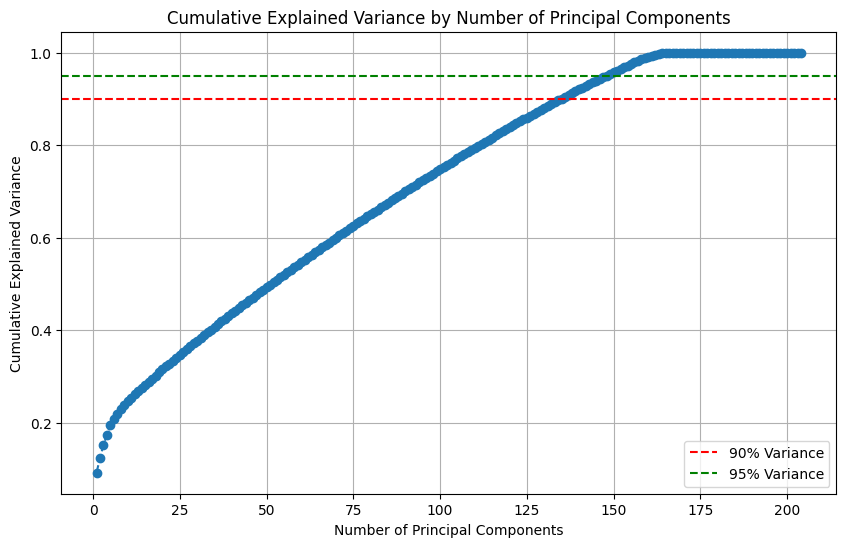

In [131]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA without reducing dimensions (n_components=None) to see explained variance for all components
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.grid()
plt.show()

In [132]:
# Check if the file exists in the current directory
file_exists = os.path.exists('final_dataset.csv')

if file_exists:
    # Load the dataset if it exists
    final_dataset = pd.read_csv('final_dataset.csv')

    # Print the available columns to verify the target column name
    print(final_dataset.columns)

    # Replace 'Target' with the actual target column name from the printed list
    # For example, if the target column is named 'Status Code', use:
    target_column = 'Status Code'  # Replace with your target column name

    # Dropping target column for PCA and scaling the features
    X = final_dataset.drop(columns=[target_column])
    y = final_dataset[target_column]

    # --- Changes start here ---
    # Identify columns with object (string) dtype that might contain dates
    object_columns = X.select_dtypes(include=['object']).columns

    # Convert date/time columns to numerical representation
    for col in object_columns:
        try:
            # Attempt to convert to datetime and then to Unix timestamp
            X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
        except ValueError:
            print(f"Column '{col}' could not be converted to datetime, skipping.")
            # Drop non-date string columns
            X.drop(columns=[col], inplace=True)
    # --- Changes end here ---

    # Apply PCA at 200 features (changed part of the code)
    pca = PCA(n_components=200)
    X_pca = pca.fit_transform(X)

    # Splitting data into training and testing sets
    # This line was moved from a separate cell to ensure X_pca and y are defined.
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

else:
    # Handle the case where the file doesn't exist
    print("Error: final_dataset.csv not found in the current directory.")

Index(['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity End Date',
       'First Name', 'Date of Birth', 'Country', 'Institution Name',
       'Current/Intended Major', 'Entry created at', 'Status Code',
       ...
       'First_Name_Hash_50', 'First_Name_Hash_51', 'First_Name_Hash_52',
       'First_Name_Hash_53', 'First_Name_Hash_54', 'First_Name_Hash_55',
       'First_Name_Hash_56', 'First_Name_Hash_57', 'First_Name_Hash_58',
       'First_Name_Hash_59'],
      dtype='object', length=218)
Column 'Opportunity Id' could not be converted to datetime, skipping.
Column 'First Name' could not be converted to datetime, skipping.
Column 'Country' could not be converted to datetime, skipping.
Column 'Institution Name' could not be converted to datetime, skipping.
Column 'Current/Intended Major' could not be converted to datetime, skipping.
Column 'SignUpDayOfWeek' could not be converted to datetime, skipping.
Column 'Opportunity Id.1' could not be converted to datetime, skipping.
C

C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1422301696.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1422301696.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1422301696.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1422301696.py:27: 

Column 'SignUpDayOfWeek.1' could not be converted to datetime, skipping.


In [133]:
# Check if the file exists in the current directory
file_exists = os.path.exists('final_dataset.csv')

if file_exists:
    # Load the dataset if it exists
    final_dataset = pd.read_csv('final_dataset.csv')

    # Print the available columns to identify the correct target column name
    print(final_dataset.columns)

    # Replace 'Target' with the actual target column name from the printed list
    # For example, if the target column is named 'Status Code', use:
    target_column = 'Status Code'  # Replace with your actual target column name

    # Dropping target column for PCA and scaling the features
    X = final_dataset.drop(columns=[target_column])  # Use the correct target column name
    y = final_dataset[target_column]  # Use the correct target column name

    # --- Changes start here ---
    # Identify columns with object (string) dtype that might contain dates
    object_columns = X.select_dtypes(include=['object']).columns

    # Convert date/time columns to numerical representation
    for col in object_columns:
        try:
            # Attempt to convert to datetime and then to Unix timestamp
            X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
        except ValueError:
            print(f"Column '{col}' could not be converted to datetime, trying to handle as categorical.")
            # Handle as categorical using one-hot encoding if it's not a datetime
            X = pd.get_dummies(X, columns=[col], drop_first=True)  # One-hot encode and drop first category
    # --- Changes end here ---

    # Apply PCA
    pca = PCA(n_components=30)
    X_pca = pca.fit_transform(X)

    # Splitting data into training and testing sets
    # This line was moved from a separate cell to ensure X_pca and y are defined before they are used.
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    # Scaling the data using StandardScaler
    # These lines were moved here to ensure X_train and X_test are defined before scaling.
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

else:
    # Handle the case where the file doesn't exist
    print("Error: final_dataset.csv not found in the current directory.")

Index(['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity End Date',
       'First Name', 'Date of Birth', 'Country', 'Institution Name',
       'Current/Intended Major', 'Entry created at', 'Status Code',
       ...
       'First_Name_Hash_50', 'First_Name_Hash_51', 'First_Name_Hash_52',
       'First_Name_Hash_53', 'First_Name_Hash_54', 'First_Name_Hash_55',
       'First_Name_Hash_56', 'First_Name_Hash_57', 'First_Name_Hash_58',
       'First_Name_Hash_59'],
      dtype='object', length=218)
Column 'Opportunity Id' could not be converted to datetime, trying to handle as categorical.
Column 'First Name' could not be converted to datetime, trying to handle as categorical.
Column 'Country' could not be converted to datetime, trying to handle as categorical.
Column 'Institution Name' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: 

Column 'Current/Intended Major' could not be converted to datetime, trying to handle as categorical.
Column 'SignUpDayOfWeek' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Opportunity Id.1' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Opportunity Name' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Opportunity Category' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Gender' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Country.1' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_6632\1563224379.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Status Description' could not be converted to datetime, trying to handle as categorical.
Column 'SignUpDayOfWeek.1' could not be converted to datetime, trying to handle as categorical.


In [134]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Columns: 157 entries, Learner SignUp DateTime to First_Name_Hash_59
dtypes: datetime64[ns](5), float64(134), int64(9), object(8), period[M](1)
memory usage: 10.3+ MB


In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
import joblib
# Check if the dataset exists
if os.path.exists('final_dataset.csv'):
    # Load the dataset
    final_dataset = pd.read_csv('final_dataset.csv')
    X = final_dataset.drop(columns=['Status Code'])
    y = final_dataset['Status Code']

    # Handle non-numeric columns (e.g., dates, categorical text) in the dataset
    object_columns = X.select_dtypes(include=['object']).columns
    for col in object_columns:
        try:
            X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Convert to timestamps
        except ValueError:
            X = pd.get_dummies(X, columns=[col], drop_first=True)  # One-hot encode if not datetime

    # Apply PCA to reduce features while retaining 95% of the variance
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    # Define a function to evaluate models
    def evaluate_model(model, model_name):
        print(f"\n--- Evaluating {model_name} ---")

        pipeline = Pipeline([
            ('scaler', StandardScaler()),  # Standardize data
            ('model', model)
        ])

        # Perform Cross-Validation
        cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='balanced_accuracy')
        print(f"{model_name} Cross-Validation Balanced Accuracy: {np.mean(cross_val_scores):.2f}")

        # Fit the model on the training set and evaluate
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        print(f"{model_name} Test Set Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
        print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, y_pred))

        # Save the best model
        joblib.dump(pipeline, f"{model_name}_best_model.joblib")
        print(f"{model_name} saved as {model_name}_best_model.joblib")

    # Function to get performance metrics and identify classes to drop
    def get_class_performance_and_drop_classes(model):
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Identify classes to drop
        classes_to_drop = set()
        for cls, metrics in report.items():
            if isinstance(metrics, dict):  # Ensure 'metrics' is a dictionary
                precision = metrics.get('precision', 0)
                recall = metrics.get('recall', 0)
                if precision == 0.0 and recall == 0.0 and cls not in ['accuracy', 'macro avg', 'weighted avg']:
                    classes_to_drop.add(cls)

        return report, classes_to_drop

    # Define models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    # Evaluate models to get class performance
    model_performance = {}
    classes_to_drop_total = set()

    for model_name, model in models.items():
        performance, classes_to_drop = get_class_performance_and_drop_classes(model)
        model_performance[model_name] = performance
        classes_to_drop_total.update(classes_to_drop)  # Accumulate classes to drop

    print(f"Classes to drop after evaluating all models: {classes_to_drop_total}")

    # Drop the identified classes from the dataset
    mask = ~y.isin(classes_to_drop_total)
    X_filtered = X[mask]
    y_filtered = y[mask]

    # Reapply PCA to the filtered dataset
    pca_filtered = PCA(n_components=0.95)
    X_filtered_pca = pca_filtered.fit_transform(X_filtered)

    # Split the filtered dataset
    X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered_pca, y_filtered, test_size=0.3, random_state=42)

    # Evaluate models on the filtered dataset
    for model_name, model in models.items():
        evaluate_model(model, model_name)

else:
    print("Error: final_dataset.csv not found in the current directory.")

C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2986503410.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Convert to timestamps
C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2986503410.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Convert to timestamps
C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2986503410.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9  # Convert to tim

Classes to drop after evaluating all models: {'1120', '1010', '1070', '1050', '1080', '1040', '1110'}

--- Evaluating Logistic Regression ---
Logistic Regression Cross-Validation Balanced Accuracy: 0.12
Logistic Regression Test Set Accuracy: 0.41


C:\Users\shahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

        1010       0.00      0.00      0.00        37
        1030       0.41      1.00      0.59      1063
        1040       0.00      0.00      0.00        28
        1050       0.00      0.00      0.00       184
        1070       0.00      0.00      0.00       979
        1080       0.00      0.00      0.00       246
        1110       0.00      0.00      0.00        25
        1120       0.00      0.00      0.00         6

    accuracy                           0.41      2568
   macro avg       0.05      0.12      0.07      2568
weighted avg       0.17      0.41      0.24      2568

Confusion Matrix for Logistic Regression:
 [[   0   37    0    0    0    0    0    0]
 [   0 1063    0    0    0    0    0    0]
 [   0   28    0    0    0    0    0    0]
 [   0  184    0    0    0    0    0    0]
 [   0  979    0    0    0    0    0    0]
 [   0  246    0    0    0    0    0    0]


C:\Users\shahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

        1010       0.00      0.00      0.00        37
        1030       0.50      0.67      0.57      1063
        1040       0.00      0.00      0.00        28
        1050       0.13      0.08      0.10       184
        1070       0.45      0.42      0.43       979
        1080       0.26      0.07      0.11       246
        1110       0.20      0.04      0.07        25
        1120       0.00      0.00      0.00         6

    accuracy                           0.45      2568
   macro avg       0.19      0.16      0.16      2568
weighted avg       0.41      0.45      0.42      2568

Confusion Matrix for K-Nearest Neighbors:
 [[  0  19   0   2  16   0   0   0]
 [  8 715   0  34 287  18   1   0]
 [  0  15   0   1  11   1   0   0]
 [  5  86   0  14  72   6   1   0]
 [  5 482   1  49 414  26   2   0]
 [  1 107   0   3 117  18   0   0]
 [  0  12   0   5   7   0   1   0]
 [  0   2   0

C:\Users\shahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [2]:

# Check if the file exists in the current directory
file_exists = os.path.exists('final_dataset.csv')

if file_exists:
    # Load the dataset if it exists
    final_dataset = pd.read_csv('final_dataset.csv')
    # Dropping target column for PCA and scaling the features

    # Change 'Target' to 'Status Code' to match the actual column name
    X = final_dataset.drop(columns=['Status Code'])
    y = final_dataset['Status Code']

    # --- Changes start here ---
    # Identify columns with object (string) dtype that might contain dates or other non-numeric data
    object_columns = X.select_dtypes(include=['object']).columns

    # Convert date/time columns to numerical representation and handle other string columns
    for col in object_columns:
        try:
            # Attempt to convert to datetime and then to Unix timestamp
            X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
        except ValueError:
            print(f"Column '{col}' could not be converted to datetime, trying to handle as categorical.")
            # Handle as categorical using one-hot encoding if it's not a datetime
            # This will create new columns with numerical values representing the categories
            X = pd.get_dummies(X, columns=[col], drop_first=True, dummy_na=False)  # One-hot encode and drop first category to avoid multicollinearity
    # --- Changes end here ---

    # Apply PCA
    pca = PCA(n_components=200)
    X_pca = pca.fit_transform(X)

    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    # Scaling the data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define and train models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy: {accuracy:.2f}")

else:
    # Handle the case where the file doesn't exist
    print("Error: final_dataset.csv not found in the current directory.")



C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Opportunity Id' could not be converted to datetime, trying to handle as categorical.
Column 'First Name' could not be converted to datetime, trying to handle as categorical.
Column 'Country' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Institution Name' could not be converted to datetime, trying to handle as categorical.
Column 'Current/Intended Major' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'SignUpDayOfWeek' could not be converted to datetime, trying to handle as categorical.
Column 'Opportunity Id.1' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Opportunity Name' could not be converted to datetime, trying to handle as categorical.
Column 'Opportunity Category' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9
C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Gender' could not be converted to datetime, trying to handle as categorical.
Column 'Country.1' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'Status Description' could not be converted to datetime, trying to handle as categorical.


C:\Users\shahi\AppData\Local\Temp\ipykernel_1596\2336464890.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(np.int64) // 10**9


Column 'SignUpDayOfWeek.1' could not be converted to datetime, trying to handle as categorical.
Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 0.98
Random Forest Accuracy: 1.00
